In [0]:
import torch
import torch.nn as nn
import torchvision.transforms as transform
import torchvision.datasets as dataset
import matplotlib.pyplot as plt

In [2]:
train_data = dataset.MNIST(root='./data', train=True, transform=transform.ToTensor(), download=True)
test_data = dataset.MNIST(root='./data', train=False, transform=transform.ToTensor())

0it [00:00, ?it/s]

9920512it [00:01, 9423117.97it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 138737.54it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


1654784it [00:00, 2279365.24it/s]                            
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


8192it [00:00, 52432.72it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


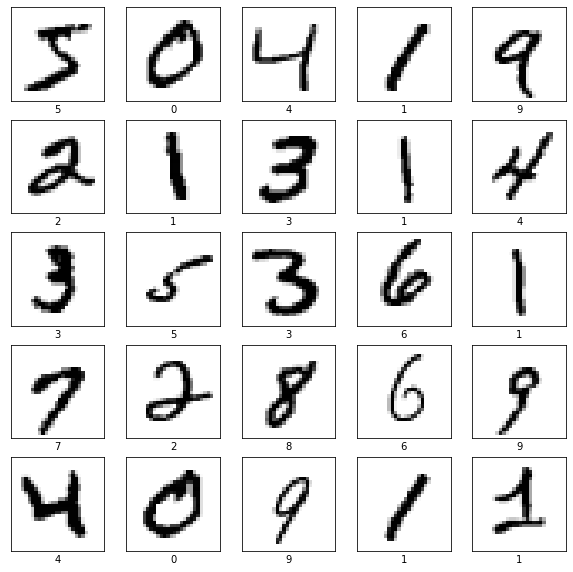

In [3]:
plt.figure(figsize=(10,10))
for i, (images, labels) in enumerate(train_data):

    if i == 25:
      break
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images.reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(labels)
plt.show()

In [0]:
batch_size = 100
n_iters = 3000
n_epochs = int(n_iters/(len(train_data)/batch_size))

In [0]:
train_load = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_load = torch.utils.data.DataLoader(dataset=test_data,batch_size=batch_size, shuffle=False)

In [0]:
class FeedForwardNNSigmoid(nn.Module):
  def __init__(self, dim_in, dim_hid, dim_out):
    super(FeedForwardNNSigmoid, self).__init__()
    self.layerin = nn.Linear(dim_in, dim_hid) #input linear layer
    self.layerhid = nn.Sigmoid() #hidden layer 
    self.layerout = nn.Linear(dim_hid, dim_out) # output layer

  def FeedForward(self, x):
    out = self.layerin(x)
    out = self.layerhid(out)
    out = self.layerout(out)
    return out

class FeedForwardNNTanh(nn.Module):
  def __init__(self, dim_in, dim_hid, dim_out):
    super(FeedForwardNNTanh, self).__init__()
    self.layerin = nn.Linear(dim_in, dim_hid) #input linear layer
    self.layerhid = nn.Tanh() #hidden layer 
    self.layerout = nn.Linear(dim_hid, dim_out) # output layer

  def FeedForward(self, x):
    out = self.layerin(x)
    out = self.layerhid(out)
    out = self.layerout(out)
    return out

class FeedForwardNNRelu(nn.Module):
  def __init__(self, dim_in, dim_hid, dim_out):
    super(FeedForwardNNRelu, self).__init__()
    self.layerin = nn.Linear(dim_in, dim_hid) #input linear layer
    self.layerhid = nn.ReLU() #hidden layer 
    self.layerout = nn.Linear(dim_hid, dim_out) # output layer

  def FeedForward(self, x):
    out = self.layerin(x)
    out = self.layerhid(out)
    out = self.layerout(out)
    return out

In [0]:
dim_in = 28*28
dim_hid = 25
dim_out = 10

NNmodel = FeedForwardNNSigmoid(dim_in, dim_hid, dim_out)
NNmodelTanh = FeedForwardNNTanh(dim_in, dim_hid, dim_out)
NNmodelRelu = FeedForwardNNRelu(dim_in, dim_hid, dim_out)

In [0]:
loss_criteria = nn.CrossEntropyLoss()

In [0]:
learning_rate = 0.1

optimizer = torch.optim.SGD(NNmodel.parameters(), lr=learning_rate)
optimizerTanh = torch.optim.SGD(NNmodelTanh.parameters(), lr=learning_rate)
optimizerRelu = torch.optim.SGD(NNmodelRelu.parameters(), lr=learning_rate)

In [27]:
iter = 0
for epochs in range(n_epochs):
  for i ,(images, labels) in enumerate(train_load):
    images = images.view(-1,28*28).requires_grad_()
    optimizer.zero_grad()
    outputs = NNmodel.FeedForward(images)
    loss = loss_criteria(outputs, labels)
    optimizer.step()

    iter += 1
    if iter % 500 == 0:
      correct = 0
      total = 0
      for images, labels in test_load:
        images = images.view(-1, 28*28).requires_grad_()
        outputs = NNmodel.FeedForward(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100*correct/total

      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 2.299140214920044. Accuracy: 9
Iteration: 1000. Loss: 2.3018698692321777. Accuracy: 9
Iteration: 1500. Loss: 2.318535804748535. Accuracy: 9
Iteration: 2000. Loss: 2.307161331176758. Accuracy: 9
Iteration: 2500. Loss: 2.2937233448028564. Accuracy: 9
Iteration: 3000. Loss: 2.3099303245544434. Accuracy: 9


In [28]:
iter = 0
for epochs in range(n_epochs):
  for i ,(images, labels) in enumerate(train_load):
    images = images.view(-1,28*28).requires_grad_()
    optimizer.zero_grad()
    outputs = NNmodel.FeedForward(images)
    loss = loss_criteria(outputs, labels)
    loss.backward()
    optimizer.step()

    iter += 1
    if iter % 500 == 0:
      correct = 0
      total = 0
      for images, labels in test_load:
        images = images.view(-1, 28*28).requires_grad_()
        outputs = NNmodel.FeedForward(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100*correct/total

      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 0.8114842772483826. Accuracy: 84
Iteration: 1000. Loss: 0.40777286887168884. Accuracy: 88
Iteration: 1500. Loss: 0.42580750584602356. Accuracy: 90
Iteration: 2000. Loss: 0.335389107465744. Accuracy: 90
Iteration: 2500. Loss: 0.3208636939525604. Accuracy: 91
Iteration: 3000. Loss: 0.19828437268733978. Accuracy: 91


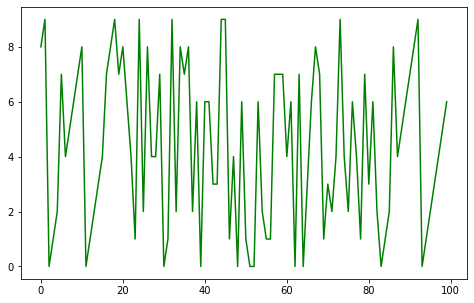

In [0]:
plt.figure(figsize=(8,5))
plt.plot(labels, color='red')
plt.plot(predicted, color='green')
plt.show()

In [0]:
iter = 0
for epochs in range(n_epochs):
  for i ,(images, labels) in enumerate(train_load):
    images = images.view(-1,28*28).requires_grad_()
    optimizerTanh.zero_grad()
    outputs = NNmodelTanh.FeedForward(images)
    loss = loss_criteria(outputs, labels)
    loss.backward()
    optimizerTanh.step()

    iter += 1
    if iter % 500 == 0:
      correct = 0
      total = 0
      for images, labels in test_load:
        images = images.view(-1, 28*28).requires_grad_()
        outputs = NNmodelTanh.FeedForward(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100*correct/total

      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 0.43166524171829224. Accuracy: 91
Iteration: 1000. Loss: 0.2569350600242615. Accuracy: 92
Iteration: 1500. Loss: 0.18205520510673523. Accuracy: 92
Iteration: 2000. Loss: 0.20952832698822021. Accuracy: 93
Iteration: 2500. Loss: 0.2065759152173996. Accuracy: 93
Iteration: 3000. Loss: 0.21686017513275146. Accuracy: 94


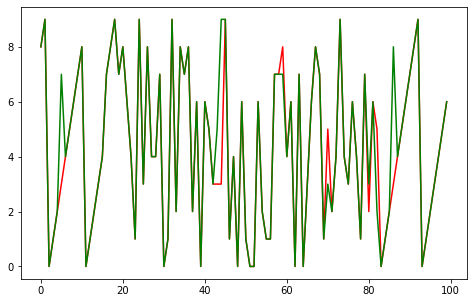

In [0]:
plt.figure(figsize=(8,5))
plt.plot(labels, color='red')
plt.plot(predicted, color='green')
plt.show()

In [0]:
iter = 0
for epochs in range(n_epochs):
  for i ,(images, labels) in enumerate(train_load):
    images = images.view(-1,28*28).requires_grad_()
    optimizerRelu.zero_grad()
    outputs = NNmodelRelu.FeedForward(images)
    loss = loss_criteria(outputs, labels)
    loss.backward()
    optimizerRelu.step()

    iter += 1
    if iter % 500 == 0:
      correct = 0
      total = 0
      for images, labels in test_load:
        images = images.view(-1, 28*28).requires_grad_()
        outputs = NNmodelRelu.FeedForward(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum()

      accuracy = 100*correct/total

      print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))


Iteration: 500. Loss: 0.2845997214317322. Accuracy: 91
Iteration: 1000. Loss: 0.33066847920417786. Accuracy: 92
Iteration: 1500. Loss: 0.25300323963165283. Accuracy: 92
Iteration: 2000. Loss: 0.2047814130783081. Accuracy: 93
Iteration: 2500. Loss: 0.19033433496952057. Accuracy: 94
Iteration: 3000. Loss: 0.18776363134384155. Accuracy: 94


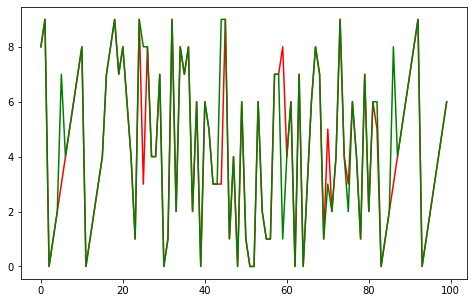

In [0]:
plt.figure(figsize=(8,5))
plt.plot(labels, color='red')
plt.plot(predicted, color='green')
plt.show()